In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../urls/data/scraped_urls.psv.gz', sep='|')

In [5]:
df.head()

,fish,url
0,sea lamprey,https://upload.wikimedia.org/wikipedia/commons...
1,sea lamprey,http://www.glfc.org/images/factsheets/sea_lamp...
2,sea lamprey,https://i.ytimg.com/vi/IgrOK_831DY/hqdefault.jpg
3,sea lamprey,http://www.invadingspecies.com/wp-content/gall...
4,sea lamprey,http://www.protectyourwaters.net/hitchhikers/i...


In [9]:
for i in range(2,5):
    print(i)

2
3
4


In [3]:
import numpy as np

In [3]:
import subprocess

In [253]:
subprocess.call(['mkdir','-p','temp'])
for fish in list(set(df.fish)):
    subprocess.call(['mkdir','-p','temp/'+fish.replace(' ','_')])

In [ ]:
i

In [249]:
ioffset = 1998

In [4]:
prev_fish='alewife'
for i in range(1415,1420):#len(df)):
    row = df.iloc[i]
    if np.mod(i,50) == 0:
        print(i/(len(df))*100., '%')
    
    url = df.iloc[i].url
    if (url[-4:] == '.jpg') and (url.find(' ') == -1):
        try:
            urlretrieve(url,'temp/' + row.fish.replace(' ','_') + '/' + row.fish.replace(' ','_') + '-' + str(i) + '.jpg')
        except:
            print('bad url: ',url)

bad url:  http://catsandcarp.com/wp-content/uploads/2013/12/Fantailed-carp.jpg
bad url:  https://archive.usgs.gov/archive/sites/fl.biology.usgs.gov/Carp_ID/assets/images/carp_id_fig_34.jpg
bad url:  https://s-media-cache-ak0.pinimg.com/736x/cf/26/26/cf262614afe9bd9a0b917d945620d2f8.jpg


In [251]:
i

1258

In [6]:
url = df.iloc[0].url

In [7]:
url

'https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Sea_Lamprey_fish.jpg/1200px-Sea_Lamprey_fish.jpg'

In [15]:
from PIL import Image
import requests
from io import StringIO, BytesIO

In [11]:
response = requests.get(url)
img = Image.open(StringIO(response.content))

TypeError: initial_value must be str or None, not bytes

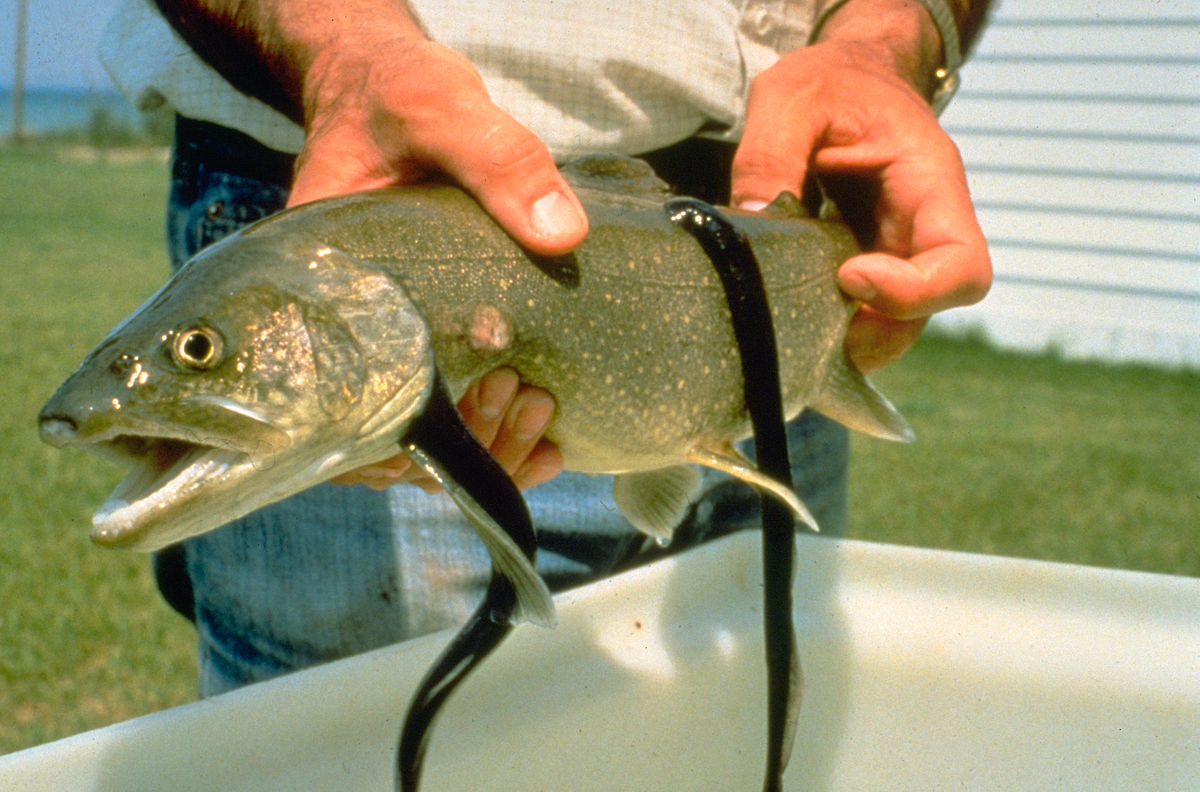

In [33]:
response = requests.get(url)
Image.open(BytesIO(response.content))

In [48]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

In [49]:
from urllib.request import urlretrieve
urlretrieve(url,url.split('/')[-1])

('1200px-Sea_Lamprey_fish.jpg', <http.client.HTTPMessage at 0x14263dc88>)

In [50]:
from urllib.request import urlretrieve
urlretrieve(url,url.split('/')[-1])
img_path = url.split('/')[-1]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
model = applications.VGG16(include_top=False, weights='imagenet')

In [53]:


preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n01440764', 'tench', 0.85957623), ('n04067472', 'reel', 0.062848814), ('n02514041', 'barracouta', 0.04819512)]


In [54]:
from keras.applications.vgg16 import VGG16

model2 = VGG16(weights='imagenet', include_top=False)


In [56]:


preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n01440764', 'tench', 0.85957623), ('n04067472', 'reel', 0.062848814), ('n02514041', 'barracouta', 0.04819512)]


In [58]:
response = requests.get(url)
Image.open(BytesIO(response.content))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


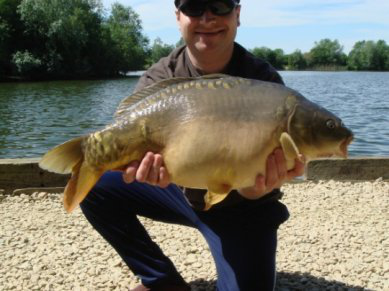

In [132]:
Image.open('data/test/carp/carp-527.jpg')

In [ ]:
img = Image.open('data/test/carp/carp-527.jpg')

In [59]:
preds = model.predict(x)

In [61]:
from keras.applications.vgg16 import decode_predictions

In [67]:
decode_predictions(preds, top=3)[0]

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 7, 7, 512)

In [63]:
model3 = VGG16(weights='imagenet')

In [64]:
preds = model3.predict(x)

In [66]:
preds = model2.predict(x)

In [69]:
np.shape(preds)

(1, 7, 7, 512)

In [74]:
x = np.array([1,2,3])

In [76]:
x[0]

1

In [78]:
x = np.concatenate((preds,preds))

In [79]:
np.shape(x)

(2, 7, 7, 512)

In [82]:
df.groupby('fish').count()

,url
fish,
alewife,600
atlantic salmon,600
bigmouth buffalo,600
black bass,600
black crappie,600
bluegill,300
bowfin,600
bullhead,600
burbot,500


In [6]:
carp = df[df.fish == 'carp']
walleye = df[df.fish == 'walleye']

In [7]:
carp.head()

,fish,url
1077,carp,https://upload.wikimedia.org/wikipedia/commons...
1078,carp,http://www.iowadnr.gov/portals/idnr/uploads/fi...
1079,carp,http://fishermensangle.com/wp-content/uploads/...
1080,carp,http://graytaxidermy.com/images/large-fishmoun...
1081,carp,https://upload.wikimedia.org/wikipedia/commons...


In [94]:
for i in range(len(carp)):
    url = carp.iloc[i].url
    try:
        if url.split('.')[-1].find('jpg') >= 0:
            urlretrieve(url,'carp/carp-' + str(i) + '.jpg')
    except:
        print('bad url: ',url)

bad url:  http://www.fishingtipsdepot.com/images/carp-fishing.jpg
bad url:  http://www.roysfarm.com/wp-content/uploads/2014/03/Common+Carp.jpg
bad url:  http://clearwatersky.com/wp-content/uploads/2015/04/CWS-Carp-2-wpcf_622x301.jpg
bad url:  http://sirhealth.com/wp-content/uploads/2016/04/all-parts-of-the-carp-can-be-used-as-drugs-in-traditional-medicine-42-2.jpg
bad url:  https://www.organicfacts.net/wp-content/uploads/carp.jpg
bad url:  http://www.minturnanglers.com/wp-content/uploads/2011/09/carp_lips.jpg
bad url:  http://www.catholicsforanend.org/wp-content/uploads/2016/10/IMG_8369-Copy.jpg
bad url:  http://www.roysfarm.com/wp-content/uploads/2014/03/Grass+Carp.jpg
bad url:  http://www.fishingtipsdepot.com/images/carp.jpg
bad url:  http://www.catfishingcaspe.com/wp-content/uploads/2015/05/carp-fishing-in-spain-37lb-common-carp-gallery.jpg
bad url:  https://images.food52.com/EMdHB7hexTGX7vseQ-krnue_fAI=/753x502/c73c962f-3182-4680-9be9-a262c5e1982a--Final1.jpg
bad url:  https://www.

In [96]:
for i in range(len(walleye)):
    url = walleye.iloc[i].url
    try:
        if url.split('.')[-1].find('jpg') >= 0:
            urlretrieve(url,'walleye/waleye-' + str(i) + '.jpg')
    except:
        print('bad url: ',url)

bad url:  http://www.clipartkid.com/images/755/walleye-fish-decals-fishing-decals-for-boat-truck-car-autothe-5Nd1Q7-clipart.jpg
bad url:  http://www.clipartkid.com/images/755/fish-identification-walleye-aka-pickerel-fishing-basics-amuhKy-clipart.jpg
bad url:  http://stmedia.startribune.com/images/ows_139492577649723.jpg
bad url:  http://guide.sportsmansguide.com/wp-content/uploads/Almys-Virginias-Overlooked-Walleye-Fishing-7-15-369378-R1-04-5.jpg
bad url:  http://stmedia.startribune.com/images/ows_139957942811169.jpg
bad url:  http://cdn0.wideopenspaces.com/wp-content/uploads/2016/02/Walleye-630x339.jpg
bad url:  https://www.dgif.virginia.gov/wp-content/uploads/walleye-forecast-03.jpg
bad url:  http://www.questfishing.com/images/WalleyeFishingGuide1.jpg
bad url:  http://showpiecetaxidermy.com/wp-content/uploads/20150904-walleye-skin-mount-chasing-bait-fish-webster-sd.jpg
bad url:  https://www.fishaddictions.com/images/jordan%20walleye.jpg
bad url:  https://static.vecteezy.com/system/re

In [3]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
import os

# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'data/train'
test_data_dir = 'data/test'
epochs = 50
batch_size = 5


def save_bottlebeck_features(data_dir):
    datagen = ImageDataGenerator(rescale=1. / 255)
    fish = os.listdir(data_dir)
    fish_count = 0
    for f in fish:
        fish_count += len(os.listdir(data_dir + '/' + f))
        
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    datagen = ImageDataGenerator(rescale=1. / 255)
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')
    return model.predict_generator(generator, fish_count // batch_size)


def train_top_model(train_data, validation_data):
    
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)
    return model

In [31]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

img_width, img_height = 150, 150

train_data_dir = 'data/train'
test_data_dir = 'data/test'
epochs = 50
batch_size = 32

def get_generator(data_dir):
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)
    
    return datagen.flow_from_directory(
        data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

def train_inception(train_data, validation_data):
    # create the base pre-trained model
    base_model = InceptionV3(weights='imagenet', include_top=False)

    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    # and a logistic layer -- let's say we have 200 classes
    predictions = Dense(1, activation='sigmoid')(x)

    # this is the model we will train
    model = Model(input=base_model.input, output=predictions)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit_generator(train_data, 
              50,
              epochs=epochs,
              validation_data=validation_data,
              validation_steps=25)
    return model

In [32]:
test_data = get_generator(test_data_dir)
train_data = get_generator(train_data_dir)\


Found 270 images belonging to 2 classes.
Found 627 images belonging to 2 classes.


In [33]:
inception_model = train_inception(train_data, test_data)

/Users/matthewsochor/anaconda/lib/python3.5/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  '` call to the Keras 2 API: ' + signature)


Epoch 1/50
50/50 [==============================] - 276s - loss: 0.9780 - acc: 0.6961 - val_loss: 1.5907 - val_acc: 0.3848
Epoch 2/50
50/50 [==============================] - 249s - loss: 0.4938 - acc: 0.7755 - val_loss: 1.2813 - val_acc: 0.5684
Epoch 3/50
50/50 [==============================] - 264s - loss: 0.4951 - acc: 0.7772 - val_loss: 0.4953 - val_acc: 0.7627
Epoch 4/50
50/50 [==============================] - 235s - loss: 0.4609 - acc: 0.8030 - val_loss: 0.5781 - val_acc: 0.7748
Epoch 5/50
50/50 [==============================] - 240s - loss: 0.3972 - acc: 0.8312 - val_loss: 0.3855 - val_acc: 0.8204
Epoch 6/50
50/50 [==============================] - 242s - loss: 0.4193 - acc: 0.8249 - val_loss: 0.6877 - val_acc: 0.6702
Epoch 7/50
50/50 [==============================] - 243s - loss: 0.3593 - acc: 0.8497 - val_loss: 0.4692 - val_acc: 0.7936
Epoch 8/50
50/50 [==============================] - 775s - loss: 0.4023 - acc: 0.8316 - val_loss: 0.5383 - val_acc: 0.7936
Epoch 9/50
50/50

In [34]:
model.save_weights('inception_v1_model.h5')

In [5]:
from keras.applications.resnet50 import ResNet50

In [6]:
model = ResNet50(weights='imagenet')

In [13]:
model.layers.pop()

In [14]:
for layer in model.layers:
    layer.trainable = False

In [15]:
model.add(Dense(1, activation='sigmoid'))

AttributeError: 'Model' object has no attribute 'add'

In [8]:
len(model.layers)

177

In [ ]:
model.layer

In [11]:
model.layers_by_depth?

In [10]:
model2 = Sequential()
for layer in model.layers_by_depth:
    model2.add(layer)

TypeError: The added layer must be an instance of class Layer. Found: 0

In [7]:
ResNet50?

In [4]:
test_data = save_bottlebeck_features(test_data_dir)

Found 270 images belonging to 2 classes.


In [ ]:
train_data = save_bottlebeck_features(train_data_dir)

In [194]:
model = train_top_model(train_data, validation_data)

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 5s - loss: 1.0537 - acc: 0.5763 - val_loss: 0.5085 - val_acc: 0.7900
Epoch 2/50
800/800 [==============================] - 4s - loss: 0.6189 - acc: 0.6925 - val_loss: 0.4145 - val_acc: 0.8200
Epoch 3/50
800/800 [==============================] - 4s - loss: 0.4942 - acc: 0.7725 - val_loss: 0.4148 - val_acc: 0.8400
Epoch 4/50
800/800 [==============================] - 4s - loss: 0.4308 - acc: 0.7975 - val_loss: 0.5494 - val_acc: 0.7750
Epoch 5/50
800/800 [==============================] - 4s - loss: 0.3608 - acc: 0.8375 - val_loss: 0.6937 - val_acc: 0.7550
Epoch 6/50
800/800 [==============================] - 4s - loss: 0.3368 - acc: 0.8575 - val_loss: 0.6800 - val_acc: 0.7850
Epoch 7/50
800/800 [==============================] - 4s - loss: 0.3150 - acc: 0.8925 - val_loss: 0.5604 - val_acc: 0.8350
Epoch 8/50
800/800 [==============================] - 4s - loss: 0.2572 - acc: 0.8987 - val_l

In [195]:
premodel = applications.VGG16(include_top=False, weights='imagenet')

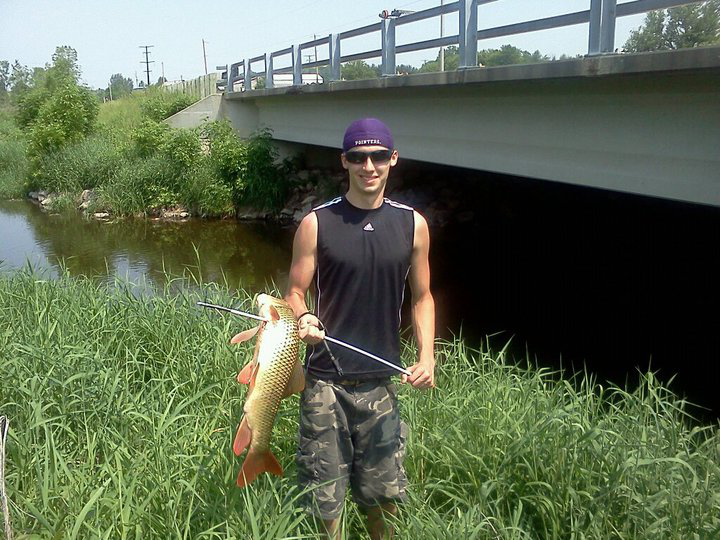

In [196]:

Image.open('data/train/carp/carp-107.jpg')

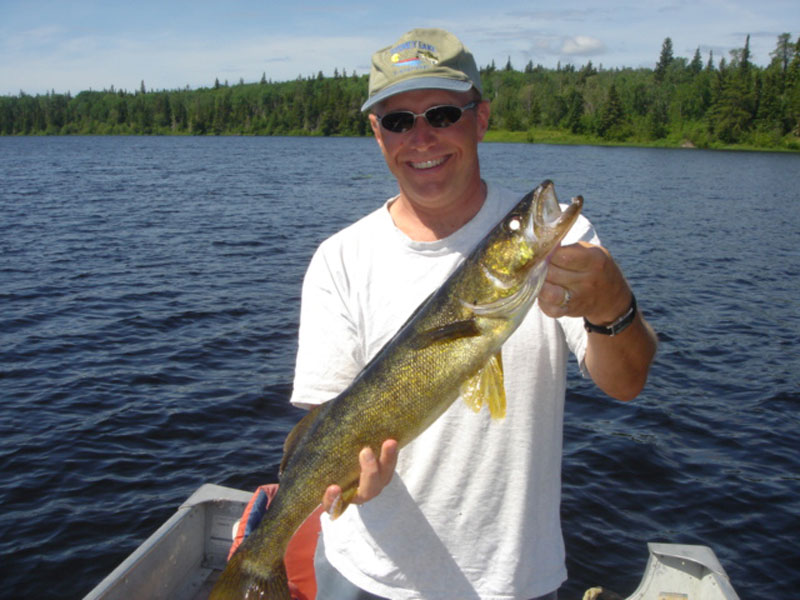

In [217]:

Image.open('data/train/walleye/waleye-119.jpg')

In [216]:
img = image.load_img('data/train/walleye/waleye-119.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(premodel.predict(x))
print(preds)

[[ 1.]]


In [126]:
np.shape(train_data)

(800, 4, 4, 512)

In [187]:
np.shape(validation_data)

(200, 4, 4, 512)

In [112]:
np.array([0]*5 + [1]*4)

array([0, 0, 0, 0, 0, 1, 1, 1, 1])

In [91]:
url

'http://img.21food.com/20110609/product/1305114960265.jpg'

In [85]:
i=1
urlretrieve(url,'carp/carp-' + str(i) + '.' + url.split('.')[-1])

('carp/carp-1.jpg', <http.client.HTTPMessage at 0x13b5a3978>)

In [ ]:
from urllib.request import urlretrieve
urlretrieve(url,url.split('/')[-1])